In [19]:
import numpy as np
import pandas as pd
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
%matplotlib inline

In [20]:
np.random.seed(42)

# Portfolio Planner

In this activity, you will use the iedfinance api to grab historical data for a 60/40 portfolio using `SPY` to represent the stock portion and `AGG` to represent the bonds.

In [21]:
from iexfinance.stocks import get_historical_data
from iexfinance.refdata import get_symbols
import iexfinance as iex

# Data Collection

In this step, you will need to use the IEX api to fetch closing prices for the `SPY` and `AGG` tickers. Save the results as a pandas DataFrame

In [22]:
list_of_tickers = ["SPY", "AGG"]
# YOUR CODE HERE
# Set start and end datetimes of 1 year, between now and 365 days ago.
end_date = datetime.now()
start_date = end_date + timedelta(-365)

# Get 1 year's worth of historical data for AAPL
df = get_historical_data(list_of_tickers, start_date, end_date,  output_format='pandas')
df.head()


SPY                                        AGG                  \
              open    high     low   close     volume    open    high     low   
date                                                                            
2018-10-08  287.05  288.22  285.50  287.82   87742172  104.38  104.40  104.29   
2018-10-09  287.39  288.86  286.77  287.40   74338982  104.39  104.51  104.32   
2018-10-10  286.83  286.91  277.88  278.30  214731042  104.34  104.46  104.23   
2018-10-11  277.08  278.90  270.36  272.17  274840491  104.59  104.86  104.51   
2018-10-12  276.77  277.09  272.37  275.95  183186492  104.71  104.87  104.68   

                              
             close    volume  
date                          
2018-10-08  104.29   2267961  
2018-10-09  104.44  21903180  
2018-10-10  104.41   3834833  
2018-10-11  104.72   7053895  
2018-10-12  104.75   5017438

# Use the `drop` function with the `level` parameter to drop extra columns in the multi-index DataFrame
df.drop(columns=['open', 'high', 'low', 'volume'], level=1, inplace=True)
df.head()

In [23]:
# Calculate the daily roi for the stocks
# YOUR CODE HERE
# Use the `drop` function with the `level` parameter to drop extra columns in the multi-index DataFrame
df.drop(columns=['open', 'high', 'low', 'volume'], level=1, inplace=True)
df.head()

,SPY,AGG
,close,close
date,,
2018-10-08,287.82,104.29
2018-10-09,287.40,104.44
2018-10-10,278.30,104.41
2018-10-11,272.17,104.72
2018-10-12,275.95,104.75


In [8]:
# Use the `pct_change` function to calculate daily returns of `SYP` and `AGG`.
daily_returns = df.pct_change()
daily_returns.head()

,SPY,AGG
,close,close
date,,
2018-10-08,NaN,NaN
2018-10-09,-0.001459,0.001438
2018-10-10,-0.031663,-0.000287
2018-10-11,-0.022027,0.002969
2018-10-12,0.013888,0.000286


In [42]:
# Use the `mean` function to calculate the mean of daily returns for `SPY` and `AGG`, respectively
#C = daily_returns.mean()['SPY']['close']
avg_daily_return_spy = daily_returns.mean()['SPY']['close']
avg_daily_return_agg = daily_returns.mean()['AGG']['close']
avg_daily_return_agg



0.0003531011220951945

In [40]:
#AVG daily return 'SPY'
avg_daily_return_spy


0.0001477786683584634

In [41]:
#AVG daily return  'AGG'
avg_daily_return_agg

0.0003531011220951945

In [44]:
# Calculate volatility AKA standard deviation 
std_dev_daily_return_spy = daily_returns.std()['SPY']['close']
std_dev_daily_return_agg = daily_returns.std()['AGG']['close']
std_dev_daily_return_agg


0.0019343075554694774

In [65]:
# Save the last day's closing price
spy_last_price = df['SPY']['close'][-1]
agg_last_price = df['AGG']['close'][-1]



In [143]:
# Setup the Monte Carlo Parameters
num_simulations = 100
number_records = 252 * 30
monte_carlo = pd.DataFrame()   #simulated_price_df = pd.DataFrame()
portfolio_cumulative_returns = pd.DataFrame()

In [73]:
# Run the Monte Carlo Simulation
# Initialize empty DataFrame to hold simulated prices for each simulation

for n in range(num_simulations):

    # Initialize the simulated prices list with the last closing price of `JNJ` and `MU`
    simulated_spy_prices = [spy_last_price]
    simulated_agg_prices = [agg_last_price]
    
    # Simulate the returns for 252 days
    for i in range(number_records):
        
        # Calculate the simulated price using the last price within the list
        simulated_spy_price = simulated_spy_prices[-1] * (1 + np.random.normal(avg_daily_return_spy, std_dev_daily_return_spy))
        simulated_agg_price = simulated_agg_prices[-1] * (1 + np.random.normal(avg_daily_return_agg, std_dev_daily_return_agg))
        
        # Append the simulated price to the list
        simulated_spy_prices.append(simulated_spy_price)
        simulated_agg_prices.append(simulated_agg_price)
    
    # Append a simulated prices of each simulation to DataFrame
    simulated_price_df["SPY prices"] = pd.Series(simulated_spy_prices)
    simulated_price_df["AGG prices"] = pd.Series(simulated_agg_prices)
    
    # Calculate the daily returns of simulated prices
    simulated_daily_returns = simulated_price_df.pct_change()
    
    # Set the portfolio weights (60% JNJ; 40% MU)
    weights = [0.60, 0.40]

    # Use the `dot` function with the weights to multiply weights with each column's simulated daily returns
    portfolio_daily_returns = simulated_daily_returns.dot(weights)
    
    # Calculate the normalized, cumulative return series
    portfolio_cumulative_returns[n] = (1 + portfolio_daily_returns.fillna(0)).cumprod()

# Print records from the DataFrame
portfolio_cumulative_returns.head()





,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.994353,0.990824,0.995736,0.988799,1.004072,0.996378,1.001845,1.010205,1.007866,0.989713,...,1.003051,0.993871,1.004244,1.011783,1.002710,1.003826,1.004527,0.996745,1.007155,0.997854
2,0.985664,0.992506,1.002211,0.996359,1.001395,0.997160,1.002854,1.015329,1.017677,0.990187,...,1.001673,0.997415,0.999978,1.015212,1.005742,1.014062,1.008507,1.000572,1.007015,0.998392
3,0.987588,0.999696,1.003025,0.999489,0.999868,0.998780,0.997474,1.010504,1.015670,0.991338,...,0.993811,1.008734,1.003439,1.022758,0.999455,1.009936,1.012115,1.008841,1.000960,0.996333
4,0.983508,0.995632,1.001797,1.001532,0.991494,0.998703,0.999980,1.002105,1.025673,0.996365,...,1.004328,1.005955,1.003823,1.026121,0.985910,1.004685,1.017417,1.011481,0.991824,1.002845


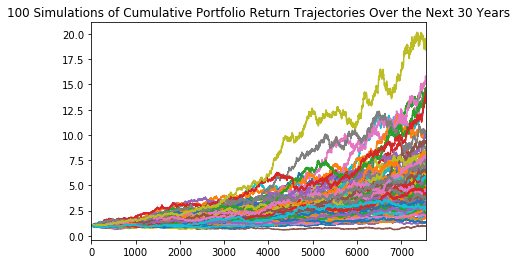

In [74]:
# Visualize the Simulation
plot_title = f"{n+1} Simulations of Cumulative Portfolio Return Trajectories Over the Next 30 Years"
portfolio_cumulative_returns.plot(legend=None, title=plot_title)




In [103]:
# Select the last row for the cumulative returns (cumulative returns at 30 years)
# YOUR CODE HERE
ending_cumulative_return_30 = portfolio_cumulative_returns.iloc[252*30, :]
ending_cumulative_return_30.head()


0    5.527192
1    3.064273
2    3.729530
3    2.284095
4    1.310822
Name: 7560, dtype: float64

In [109]:
# Select the last row for the cumulative returns (cumulative returns at 20 years)
ending_cumulative_return_20 = portfolio_cumulative_returns.iloc[252*20, :]
ending_cumulative_return_20.head()

0    4.360642
1    2.087534
2    2.210104
3    2.547230
4    1.279255
Name: 5040, dtype: float64

In [110]:
# Display the 90% confidence interval for the ending returns @ 30 yrs
confidence_interval = ending_cumulative_return_30.quantile(q=[0.05, 0.95])
confidence_interval


0.05     1.894094
0.95    13.988561
Name: 7560, dtype: float64

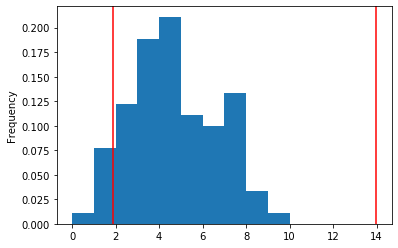

In [124]:
# Visualize the distribution of the ending returns
# Use the `plot` function to create a probability distribution histogram of simulated ending prices
# with markings for a 90% confidence interval
plt.figure();
ending_cumulative_return_30.plot(kind='hist', density=True, bins=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
plt.axvline(confidence_interval.iloc[0], color='r')
plt.axvline(confidence_interval.iloc[1], color='r')

S

---

# Retirement Analysis

In this section, you will use the monte carlo model to answer the following retirement planning questions:

1. What are the expected cumulative returns at 30 years for the 10th, 50th, and 90th percentiles?
2. Given an initial investment of `$20,000`, what is the expected portfolio return in dollars at the 10th, 50th, and 90th percentiles?
3. Given the current projected annual income from the Plaid analysis, will a 4% withdraw rate from the retirement portfolio meet or exceed that value at the 10th percentile?
4. How would a 50% increase in the initial investment amount affect the 4% retirement withdrawal?

### What are the expected cumulative returns at 30 years for the 10th, 50th, and 90th percentiles?

In [141]:
# YOUR CODE HERE
print(f"Expected cumulative portfolio return at 30 years for the 10th percentile is {round(np.percentile(ending_cumulative_return_30,10),2)}")
print(f"Expected cumulative portfolio return at 30 years for the 50th percentile is {round(np.percentile(ending_cumulative_return_30,50),2)}")
print(f"Expected cumulative portfolio return at 30 years for the 90th percentile is {round(np.percentile(ending_cumulative_return_30,90),2)}")

Expected cumulative portfolio return at 30 years for the 10th percentile is 2.28
Expected cumulative portfolio return at 30 years for the 50th percentile is 4.61
Expected cumulative portfolio return at 30 years for the 90th percentile is 9.23


### Given an initial investment of `$20,000`, what is the expected portfolio return in dollars at the 10th, 50th, and 90th percentiles?

In [142]:
# YOUR CODE HERE
initial_investment = 20000
end_exp_trn = 20000 * ending_cumulative_return_30

print(f"Expected portfolio return in dollars at the 10th percentile is ${(np.percentile(end_exp_trn,10))}")
print(f"Expected portfolio return in dollars at the 50th percentile is ${(np.percentile(end_exp_trn,50))}")
print(f"Expected portfolio return in dollars at the 90th percentile is ${(np.percentile(end_exp_trn,90))}")


                                                    






Expected portfolio return in dollars at the 10th percentile is $45679.58326123429
Expected portfolio return in dollars at the 50th percentile is $92292.31496990705
Expected portfolio return in dollars at the 90th percentile is $184537.61189520487


### Given the current projected annual income from the Plaid analysis, will a 4% withdraw rate from the retirement portfolio meet or exceed that value at the 10th percentile?

Note: This is effectively saying that 90% of the expected returns will be greater than the return at the 10th percentile, so this can help measure the uncertainty about having enough funds at retirement

In [ ]:
# YOUR CODE HERE


### How would a 50% increase in the initial investment amount affect the 4% retirement withdrawal?

In [ ]:
# YOUR CODE HERE

### Optional Challenge

In this section, you will calculate and plot the cumulative returns for the median and 90% confidence intervals. This plot shows the expected cumulative returns for any given day between the first day and the last day of investment. 

In [ ]:
# YOUR CODE HERE